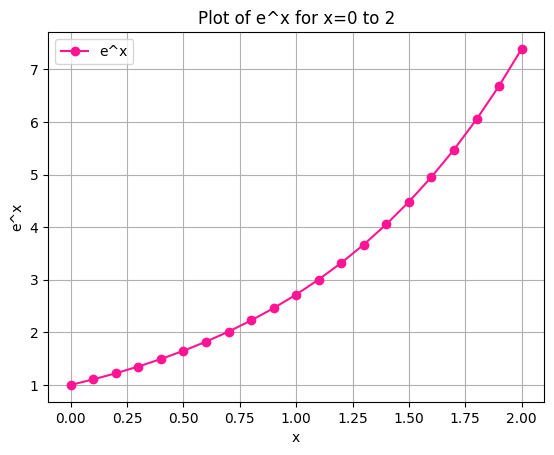

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 2.1, 0.1)
y = np.exp(x)

plt.plot(x, y, label='e^x', color='deeppink', marker='o')

plt.xlabel('x')
plt.ylabel('e^x')
plt.title('Plot of e^x for x=0 to 2')

plt.grid(True)
plt.legend()
plt.show()

The exponential function grows as x increases, as expected.

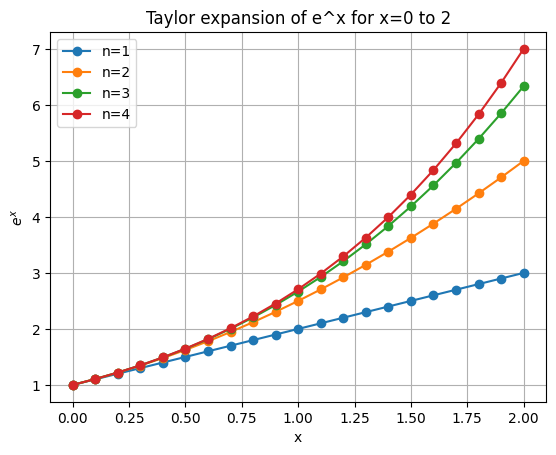

In [2]:
import math

def taylor_expansion(x, n):
    return sum((x**i) / math.factorial(i) for i in range(n + 1))

taylor = [taylor_expansion(x, n) for n in range(1, 5)]

for i, taylor in enumerate(taylor, 1):
    plt.plot(x, taylor, 'o-', label=f"n={i}")

plt.xlabel('x')
plt.ylabel(r'$e^x$')
plt.title('Taylor expansion of e^x for x=0 to 2')
plt.grid(True)
plt.legend()
plt.show()

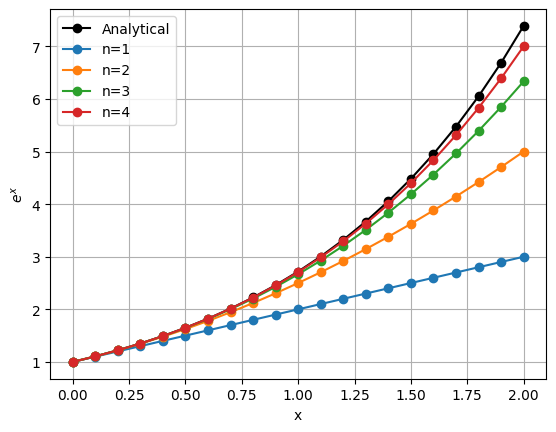

In [3]:
plt.plot(x, y, label="Analytical", color="black", marker='o')

for n in range(1, 5):
    taylor_values = [taylor_expansion(xi, n) for xi in x]
    plt.plot(x, taylor_values, marker='o', label=f"n={n}")

plt.xlabel('x')
plt.ylabel(r'$e^x$')
plt.grid(True)
plt.legend()
plt.show()

The overall curve of Taylor one is the same as the analytical one. The higher the order, the better the approximation.

For this practice, I choose the error threshold is $10^{-5}$ and the range of n from 1 to 10. And for each n, I calculate the absolute difference between the analytical value and the Taylor expansion and determine the smallest n such that the error is below the threshold.

In [4]:
error_threshold = 1E-5

for max_x in [1, 2]:
    truncation_order_found = False
    print(f"\nTruncation order for x < {max_x}:")
    
    for n in range(1, 10): 
        taylor_values = [taylor_expansion(xi, n) for xi in x]
        
        errors = np.abs(np.exp(x) - taylor_values)
        
        max_error_in_range = np.max(errors[x <= max_x])
        print(f"n = {n}, Max Error in range x < {max_x}: {max_error_in_range:.6e}")
        
        if max_error_in_range < error_threshold:
            print(f"Good approximation found with n = {n} for x < {max_x}")
            truncation_order_found = True
            break
    
    if not truncation_order_found:
        print(f"No good approximation found for x < {max_x} within the tested n range.")


Truncation order for x < 1:
n = 1, Max Error in range x < 1: 7.182818e-01
n = 2, Max Error in range x < 1: 2.182818e-01
n = 3, Max Error in range x < 1: 5.161516e-02
n = 4, Max Error in range x < 1: 9.948495e-03
n = 5, Max Error in range x < 1: 1.615162e-03
n = 6, Max Error in range x < 1: 2.262729e-04
n = 7, Max Error in range x < 1: 2.786021e-05
n = 8, Max Error in range x < 1: 3.058618e-06
Good approximation found with n = 8 for x < 1

Truncation order for x < 2:
n = 1, Max Error in range x < 2: 4.389056e+00
n = 2, Max Error in range x < 2: 2.389056e+00
n = 3, Max Error in range x < 2: 1.055723e+00
n = 4, Max Error in range x < 2: 3.890561e-01
n = 5, Max Error in range x < 2: 1.223894e-01
n = 6, Max Error in range x < 2: 3.350054e-02
n = 7, Max Error in range x < 2: 8.103718e-03
n = 8, Max Error in range x < 2: 1.754512e-03
n = 9, Max Error in range x < 2: 3.435769e-04
No good approximation found for x < 2 within the tested n range.


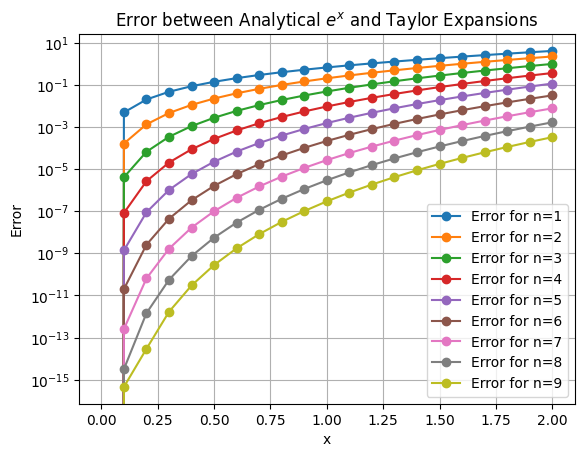

In [5]:
for n in range(1, 10):
    taylor_values = [taylor_expansion(xi, n) for xi in x]
    errors = np.abs(y - taylor_values)
    plt.plot(x, errors, marker='o', label=f"Error for n={n}")

plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error between Analytical $e^x$ and Taylor Expansions')
plt.yscale('log') 
plt.grid(True)
plt.legend()
plt.show()

Error decreases as degree n increases and grows as x increases. It can be concluded that the Taylor expansion of $e^x$ is most accurate near x=0.

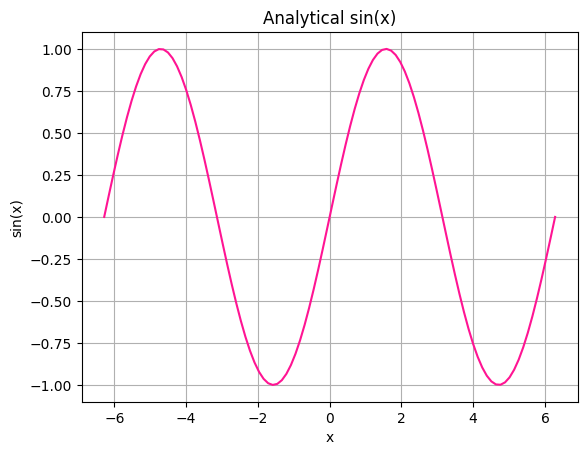

In [6]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)  
y = np.sin(x) 

plt.plot(x, y, color="deeppink")

plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Analytical sin(x)')

plt.grid(True)
plt.show()

It oscillates between -1 and 1, as expected.

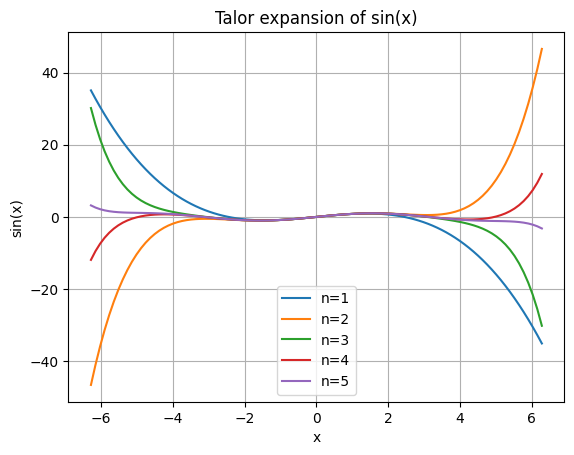

In [7]:
def taylor_sin(x, n):
    return sum(((-1)**i * (x**(2*i+1)) / math.factorial(2*i+1)) for i in range(n+1))

for n in range(1, 6):
    taylor = [taylor_sin(xi, n) for xi in x]
    plt.plot(x, taylor, label=f"n={n}")

plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Talor expansion of sin(x)')
plt.grid(True)
plt.legend()
plt.show()

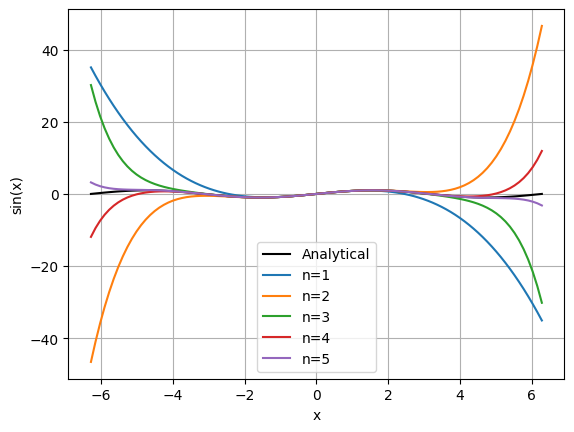

In [8]:
plt.plot(x, y, label = 'Analytical', color="black")

for n in range(1, 6):
    taylor = [taylor_sin(xi, n) for xi in x]
    plt.plot(x, taylor, label=f"n={n}")

plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.legend()
plt.show()

As it moves further from x=0, the approximation becomes less accurate.

Next I calculate the error and plot it on logarithmic scale.

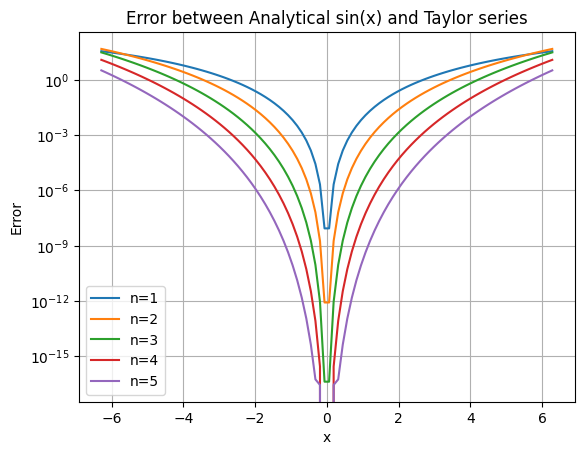

In [9]:
plt.figure()

for n in range(1, 6):
    taylor = np.array([taylor_sin(xi, n) for xi in x])
    error = np.abs(taylor - np.sin(x))
    plt.plot(x, error, label=f"n={n}")

plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error between Analytical sin(x) and Taylor series')
plt.yscale('log') 
plt.grid(True)
plt.legend()
plt.show()

As n increases, the error decreases. For low order approximations, error grows quickly as x moves away from 0. For high order, error remains low over a larger interval but still grows for large ∣x∣.

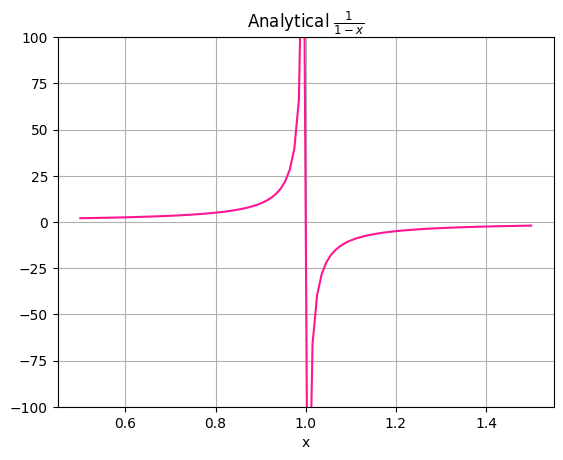

In [10]:
x = np.linspace(0.5, 1.5, 100)
x = x[x != 1]  
y = 1 / (1 - x)

plt.plot(x, y, color="deeppink")

plt.xlabel('x')
plt.title('Analytical $\\frac{1}{1-x}$')
plt.ylim([-100, 100])  
plt.grid(True)
plt.show()

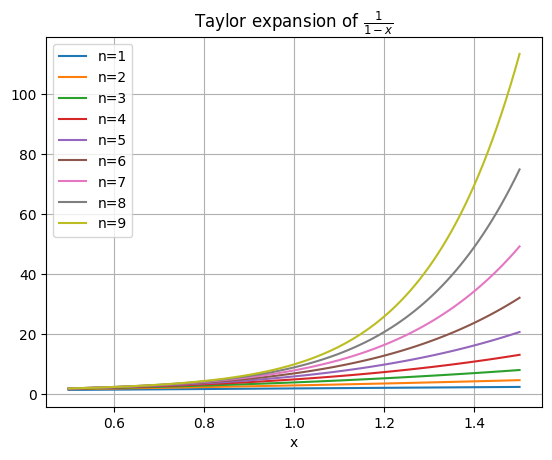

In [11]:
def taylor2(x, n):
    return sum(x ** i for i in range(n+1))

for n in range(1, 10):
    taylor = [taylor2(xi, n) for xi in x]
    plt.plot(x, taylor, label=f"n={n}")

plt.xlabel('x')
plt.title('Taylor expansion of $\\frac{1}{1-x}$')
plt.grid(True)
plt.legend()
plt.show()

For n=1, the function is almost linear. As n increases, it becomes more curved.

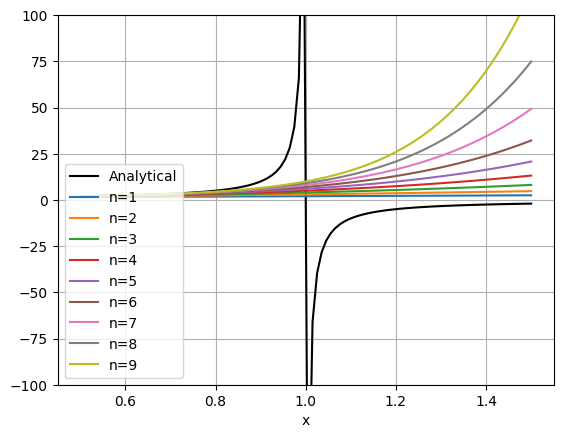

In [12]:
plt.plot(x, y, label = 'Analytical', color="black")

for n in range(1, 10):
    taylor = [taylor2(xi, n) for xi in x]
    plt.plot(x, taylor, label=f"n={n}")

plt.xlabel('x')
plt.ylim([-100, 100])  
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

The function goes to infinity at x=1, and the Taylor expansion cannot show this, as x>1, the curves rise too quick and far away from the analytical one. 

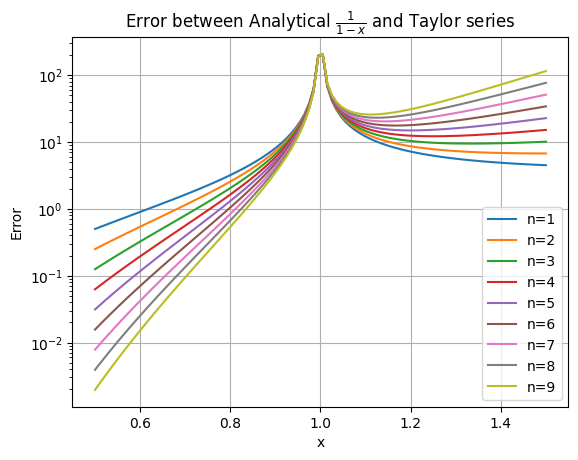

In [13]:
for n in range(1, 10):
    taylor = np.array([taylor2(xi, n) for xi in x])
    error = np.abs(taylor - y)
    plt.plot(x, error, label=f"n={n}")

plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error between Analytical $\\frac{1}{1-x}$ and Taylor series')
plt.yscale('log') 
plt.grid(True)
plt.legend()
plt.show()

Error becomes larger as x goes near 1. For x<1, the error decreases as the number of terms in the Taylor series increases. For x>1, the error increases as x move further from 1 and the error is smaller for higher orders.

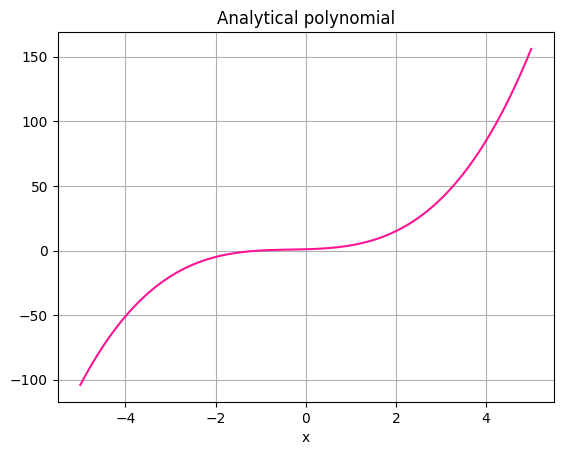

In [14]:
x = np.linspace(-5, 5, 100)  
y = x**3 + x**2 + x + 1

plt.plot(x, y, color="deeppink")

plt.xlabel('x')
plt.title('Analytical polynomial')
plt.grid(True)
plt.show()

The function is a polynomial itself, so the Taylor expansion gonna be the same. I still visualize the Taylor series approximation x=0 and show each term. From the given function, I set the Taylor up to degree 3. For better visualization, I set the linewidth of the analytical result thicker for it easier to see.

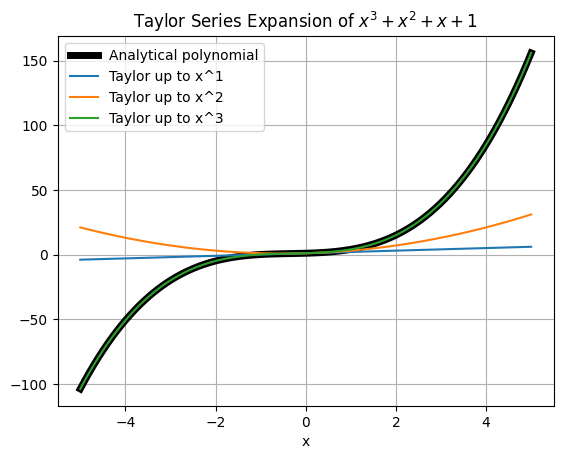

In [15]:
def taylor_poly(x, n):
    return sum([x**i for i in range(n+1)])

plt.plot(x, y, label='Analytical polynomial', color="black", linewidth=5)

for n in range(1, 4):  
    y_taylor = [taylor_poly(xi, n) for xi in x]
    plt.plot(x, y_taylor, label=f'Taylor up to x^{n}')

plt.xlabel('x')
plt.title('Taylor Series Expansion of $x^3 + x^2 + x + 1$')
plt.grid(True)
plt.legend()
plt.show()

The third-order expansion matches the analytical result perfectly. The lower the order, the more inaccurate the shape is, especially for larger x.

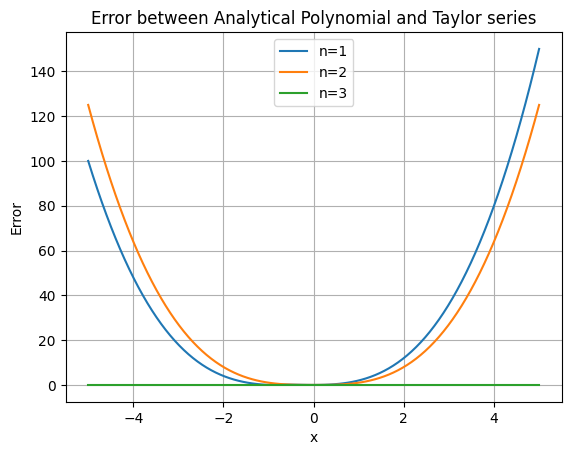

In [16]:
for n in range(1, 4):
    taylor = np.array([taylor_poly(xi, n) for xi in x])
    error = np.abs(taylor - y)
    plt.plot(x, error, label=f"n={n}")

plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error between Analytical Polynomial and Taylor series')
plt.grid(True)
plt.legend()
plt.show()

The first-order approximation has the largest error, and larger as x moves away from 0. The third-order one perfectly shapes the original function, resulting in no error.